<a href="https://colab.research.google.com/github/amanickam/pgaiml/blob/master/US_Airlines_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description: Twitter US Airline Sentiment Analysis**


**Data Description:**
      A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

**Dataset:**
      The project is from a dataset from Kaggle.
      Link to the Kaggle project site: https://www.kaggle.com/crowdflower/twitter-airline-sentiment The dataset has to be downloaded from the above Kaggle website.


Steps and tasks:
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

2. Understand of data-columns: (5 Marks)
    a. Drop all other columns except “text” and “airline_sentiment”.
    b. Check the shape of data.
    c. Print first 5 rows of data.

3. Text pre-processing: Data preparation. (20 Marks)
    a. Html tag removal.
    b. Tokenization.
    c. Remove the numbers.
    d. Removal of Special Characters and Punctuations.
    e. Conversion to lowercase.
    f. Lemmatize or stemming.
    g. Join the words in the list to convert back to text string in the dataframe. (So that each row
    contains the data in text format.)
    h. Print first 5 rows of data after pre-processing.
    
4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
    
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    performance of your model on this dataset. (8 Marks)

In [ ]:
Steps and tasks:
1. Import the libraries, load dataset, print shape of data, data description. (5 Marks)

2. Understand of data-columns: (5 Marks)
    a. Drop all other columns except “text” and “airline_sentiment”.
    b. Check the shape of data.
    c. Print first 5 rows of data.

3. Text pre-processing: Data preparation. (20 Marks)
    a. Html tag removal.
    b. Tokenization.
    c. Remove the numbers.
    d. Removal of Special Characters and Punctuations.
    e. Conversion to lowercase.
    f. Lemmatize or stemming.
    g. Join the words in the list to convert back to text string in the dataframe. (So that each row
    contains the data in text format.)
    h. Print first 5 rows of data after pre-processing.
    
4. Vectorization: (10 Marks)
    a. Use CountVectorizer.
    b. Use TfidfVectorizer.
    
5. Fit and evaluate model using both type of vectorization. (6+6 Marks)

6. Summarize your understanding of the application of Various Pre-processing and Vectorization and
    performance of your model on this dataset. (8 Marks)

# 1. Import the libraries, load dataset, print shape of data, data description. 

In [1]:
# Import necessary libraries.
import re, string, unicodedata
import pandas as pd

In [2]:

import nltk           
                        # Natural language processing tool-kit
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
!pip install contractions
import contractions

     |████████████████████████████████| 327kB 5.7MB/s 
     |████████████████████████████████| 266kB 8.2MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85393 sha256=26364d273bcf06808a4ff22a257fdc6b8b533de000b630bad0ebe20a0f4c6dfa
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [4]:
from bs4 import BeautifulSoup                 # Beautiful soup is a parsing library that can use different parsers.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    # Stopwords, and wordnet corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path='/content/drive/MyDrive/Colab Notebooks/NLP Project/'
# Load dataset.
df = pd.read_csv(path+'Tweets.csv')

In [7]:
df.shape

(14640, 15)

In [8]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [9]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [10]:
df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

# 2. Understand of data-columns:

    a. Drop all other columns except “text” and “airline_sentiment”.
    b. Check the shape of data.
    c. Print first 5 rows of data.


In [11]:
#To drop all columns except “text” and “airline_sentiment”.
cols_2_keep = ['text','airline_sentiment']

In [12]:
data = df[cols_2_keep]

In [13]:
data.shape

(14640, 2)

In [14]:
data.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


# 3. Text pre-processing: Data preparation

In [ ]:
    a. Html tag removal.
    b. Tokenization.
    c. Remove the numbers.
    d. Removal of Special Characters and Punctuations.
    e. Conversion to lowercase.
    f. Lemmatize or stemming.
    g. Join the words in the list to convert back to text string in the dataframe. (So that each row
    contains the data in text format.)
    h. Print first 5 rows of data after pre-processing.

In [15]:
#a. Html tag removal.
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))
data.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [16]:
#c. Remove the numbers.
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)    #Using regex to remove numbers
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


In [17]:
#d. Removal of Special Characters and Punctuations.
 
import re
def remove_sp_numbers(text):
  text = re.sub('[^A-Za-z0-9 ]+', '', text)    #Using regex to Special Characters and Punctuations.
  return text



data['text'] = data['text'].apply(lambda x: remove_sp_numbers(x))
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,text,airline_sentiment
0,VirginAmerica What dhepburn said,neutral
1,VirginAmerica plus youve added commercials to ...,positive
2,VirginAmerica I didnt today Must mean I need t...,neutral
3,VirginAmerica its really aggressive to blast o...,negative
4,VirginAmerica and its a really big bad thing a...,negative


In [18]:
#e. Conversion to lowercase.

data['text'] = data['text'].str.lower()
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,airline_sentiment
0,virginamerica what dhepburn said,neutral
1,virginamerica plus youve added commercials to ...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative


In [19]:
#b. Tokenization.
# Tokenize the words of whole dataframe.
for i, row in data.iterrows():
    text = data.at[i, 'text']
    words = nltk.word_tokenize(text)
    data.at[i,'text'] = words
data.head()

,text,airline_sentiment
0,"[virginamerica, what, dhepburn, said]",neutral
1,"[virginamerica, plus, youve, added, commercial...",positive
2,"[virginamerica, i, didnt, today, must, mean, i...",neutral
3,"[virginamerica, its, really, aggressive, to, b...",negative
4,"[virginamerica, and, its, a, really, big, bad,...",negative


In [20]:
#f. Lemmatize or stemming.

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems


def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return stems, lemmas

In [21]:
# Adding two columns lemma and stem to the dataframe
data['lemma'] = ''
data['stem'] = ''

for i, row in data.iterrows():
    words = data.at[i, 'text']
    stems, lemmas = stem_and_lemmatize(words)
    data.at[i,'stem'] = stems
    data.at[i, 'lemma'] = lemmas
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,airline_sentiment,lemma,stem
0,"[virginamerica, what, dhepburn, said]",neutral,"[virginamerica, what, dhepburn, say]","[virginameric, what, dhepburn, said]"
1,"[virginamerica, plus, youve, added, commercial...",positive,"[virginamerica, plus, youve, add, commercials,...","[virginameric, plu, youv, ad, commerc, to, the..."
2,"[virginamerica, i, didnt, today, must, mean, i...",neutral,"[virginamerica, i, didnt, today, must, mean, i...","[virginameric, i, didnt, today, must, mean, i,..."
3,"[virginamerica, its, really, aggressive, to, b...",negative,"[virginamerica, its, really, aggressive, to, b...","[virginameric, it, real, aggress, to, blast, o..."
4,"[virginamerica, and, its, a, really, big, bad,...",negative,"[virginamerica, and, its, a, really, big, bad,...","[virginameric, and, it, a, real, big, bad, thi..."


In [22]:

post_data = data[['text','airline_sentiment']] # Origninal post processed data


In [23]:
#g. Join the words in the list to convert back to text string in the dataframe. (So that each row
#.  contains the data in text format.)
# using lemma for this case

def normalize(words):
    return ' '.join(words)

post_data['text'] = data['lemma'].apply(lambda x: normalize(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
#h. Print first 5 rows of data after pre-processing.
post_data.head()

,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus youve add commercials to th...,positive
2,virginamerica i didnt today must mean i need t...,neutral
3,virginamerica its really aggressive to blast o...,negative
4,virginamerica and its a really big bad thing a...,negative


# 4. Vectorization:

In [110]:
# count by airline sentiment
post_data.groupby('airline_sentiment')['text'].count()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: text, dtype: int64

###Count Vectorizer


In [70]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1000)                # Keep only 1000 features as number of features will increase the processing time.
data_features_countV = vectorizer.fit_transform(post_data['text'])

data_features_countV = data_features_countV.toarray()                        # Convert the data features to array.

In [71]:
# Features (X variable)
data_features_countV.shape

(14640, 1000)

###TfidfVectorizer

In [72]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
data_features_tfid = vectorizer.fit_transform(post_data['text'])

data_features_tfid = data_features_tfid.toarray()

data_features_tfid.shape

(14640, 1000)

In [73]:
# Y variable
labels = post_data['airline_sentiment']


# 5. Fit and evaluate model using both type of vectorization.

###Model 1 using CountVectorizer features

In [74]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features_countV, labels, test_size=0.3, random_state=42)

In [75]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=20, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7234972677595628


In [58]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)

In [59]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)


[[2619  137   58]
 [ 453  379   52]
 [ 224  107  363]]


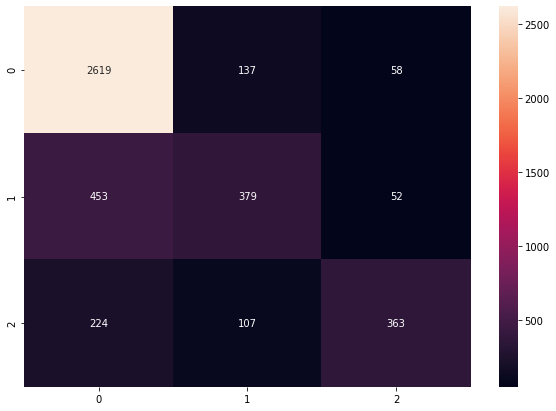

In [60]:

df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

###Model 2 using TfidfVectorizer features

In [76]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features_tfid, labels, test_size=0.3, random_state=42)

In [77]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=20, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=4,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)
0.7256147540983606


In [78]:
result = forest.predict(X_test)

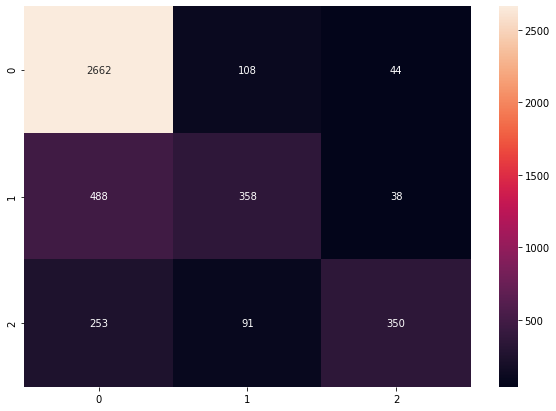

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

# 6. Summarize your understanding

Summary:

*   I used twitter dataset which has tweets in text format with the classification of sentiments as positive, negative or neutral
*   The goal was to build a model for text-classification.
*   I used only the tweet text & sentiment classification and removed all other columns

*   I Pre-processed the tweet text using variuos techniques below
      - Html tag removal.
      - Remove the numbers.
      - Removal of Special Characters and Punctuations.
      - Conversion to lowercase.
      - Tokenization      
      - Lemmatize or stemming.
*   Pre-processed tweet texts are considered as features (X) and sentiment classification is classified as Labels (Y)
*   Features are converted to numbers by using two technique (count vectorizer and tfid vectorizer, so that we can feed the data in the model)
*   At the time of vectorization, I kept only the 1000 features to increase the processing time. 
*   After building the classification model, I predicted the result for the test data.
*   I used cross validation to compute the accuracy of the model
*   Also, I used confusion matrix to visualize the accuracy of prediction
*   I tried fitting the model again by increasing the number of features during vectorization, but it did not help with the accuracy improvement

